<a href="https://colab.research.google.com/github/AhmedPandit/NLP-using-Bag-Of-Words/blob/main/IMDB_Review_Sentiment_Analysis_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Movie Review Sentiment Analysis**
### Using Bag of words and Logisitc Regression:

Let us first import the dependecies that we will require for the project



1.   Pandas -used for loading and manipulating dataset.
2.   NLTK i.e (natural language tool kit) -used for preprocessing of the text data such as cleaning the text data etc
3.   SKLEARN used for preprocessing the data and for using the machine learning models   
4.   Matplot lib for visualizing the data





In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Let us download the things that we require from nltk



1.   Stop words are generally used for ending sentences or joining sentences and are neither positive or negative e.g you,this,is,for etc.
2.   Wordnet contain synonyms and antonyms of the words
3.  PUNKT is machine learning library provided by nltk to tokenize the sentences





In [3]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# Loading the dataset
data=pd.read_csv("/content/IMDB Dataset.csv")

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Let us make a function that will preprocess the text and convert a review from the data set to cleaned review**

### By clean review I mean:
Suppose that you fetch data from the website that has HTML tags like br ,p ,html
etc. This function would remove these tags from the review. Other step is to remove the punctuation marks that provide no information toward the sentiment analysis. This function also does this



In [6]:
def preprocess_text(text):
  text=re.sub(r'<.*?>','',text) # since html tags are enclosed in <>. This regular expression would find the <> and remove them with the data present inside them
  text=re.sub(r'[^a-zA-Z\s]','',text) # since we only need words this regular expression would remove everything except words. ^ sign is used for negation

  tokens=word_tokenize(text) # now we split the review words by words
  tokens=[token.lower() for token in tokens] # now we run a loop that makes all the word lower case
  stop_words=set(stopwords.words('english')) # now we import our stop words. Using set so the stop words are not repeated.
  #stemmer=PorterStemmer()
  #tokens=[stemmer.stem(token) for token in tokens]
  tokens=[token for token in tokens if token not in stop_words] # This code says that if words of our review are not present in stop words add them to the array
  lemmatizer=WordNetLemmatizer() # Using Lemmatizer. Lemmatizer converts the large word to a simple word or its synonyms. This way word keep its meaning

  # since verb and noun convey the meaning of a sentece we lemmatize those
  tokens=[lemmatizer.lemmatize(token,pos='v') for token in tokens]
  tokens=[lemmatizer.lemmatize(token,pos='n') for token in tokens]

  # now when all the words are preprocessed we again join them into a sentence and return the text.
  preprocessed_text=' '.join(tokens)

  return preprocessed_text


In [7]:
data['Cleaned_Review']=data['review'].apply(preprocess_text) # This basically applied the preprocessing for every row of review

In [8]:
data.head()

,review,sentiment,Cleaned_Review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch oz episode youll ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stun f...


In [9]:
# Now we have to convert the textual data to numerical data. Using Bag of words we can do this
# Bag of words is basically a technique which defines a vocabulary for words and count their occurences e.g suppose we have sentence : You will regret this .
# First step is to assign vocabulary. You will be assigned 1. Will will be assigned 2,regret 3, and this 4, Then their occurence will be counted

# Count Vectorizer does the above and return us a sparse matrix.
vectorizer=CountVectorizer()
bag_of_words=vectorizer.fit_transform(data['Cleaned_Review'])



In [10]:
bag_of_words.shape

(50000, 193433)

In [11]:
density=bag_of_words.nnz/(bag_of_words.shape[0] * bag_of_words.shape[1])

In [12]:
density

0.0004886711160970466

In [13]:
vocabulary=vectorizer.vocabulary_
print("Vocabulary:", vocabulary)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
# Next is to generally view our data and the information we gathered
word_frequencies=bag_of_words.sum(axis=0)
feature_names=vectorizer.get_feature_names_out()
word_freq_dict=dict(zip(feature_names,word_frequencies.A1))

In [15]:
top_words=sorted(word_freq_dict.items(),key=lambda x:x[1],reverse=True)[:20] # fetch us the top 20 words
top_words

[('movie', 99027),
 ('film', 92119),
 ('one', 52677),
 ('make', 43985),
 ('like', 42940),
 ('see', 40679),
 ('get', 35444),
 ('time', 29795),
 ('good', 28615),
 ('character', 27577),
 ('watch', 27074),
 ('go', 26861),
 ('even', 24754),
 ('story', 24229),
 ('would', 24001),
 ('think', 23958),
 ('really', 22900),
 ('show', 21410),
 ('scene', 20706),
 ('look', 19210)]

In [16]:
word,freqs=zip(*top_words)

In [17]:
word

('movie',
 'film',
 'one',
 'make',
 'like',
 'see',
 'get',
 'time',
 'good',
 'character',
 'watch',
 'go',
 'even',
 'story',
 'would',
 'think',
 'really',
 'show',
 'scene',
 'look')

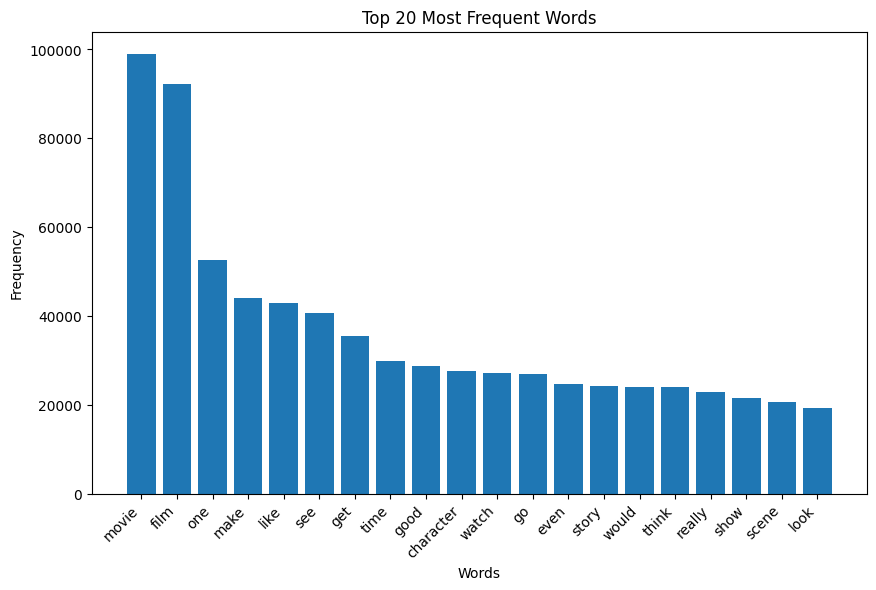

In [18]:
plt.figure(figsize=(10,6))
plt.bar(word,freqs)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [ ]:
bag_of_words.shape

(50000, 193433)

In [ ]:
min(bag_of_words.shape)

50000

In [ ]:
bag_of_words.shape[1]-1

193432

In [19]:
# Now we use truncated SVD as a feature extraction technique. Could not have used PCA as it requires a simple matrix not a sparse matrix.
# By hit and trial found the number of components that best fit the data.
# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=500)

# Fit TruncatedSVD to your sparse matrix
svd.fit(bag_of_words)


TruncatedSVD(n_components=500)

In [20]:
print( len(svd.explained_variance_ratio_))

500


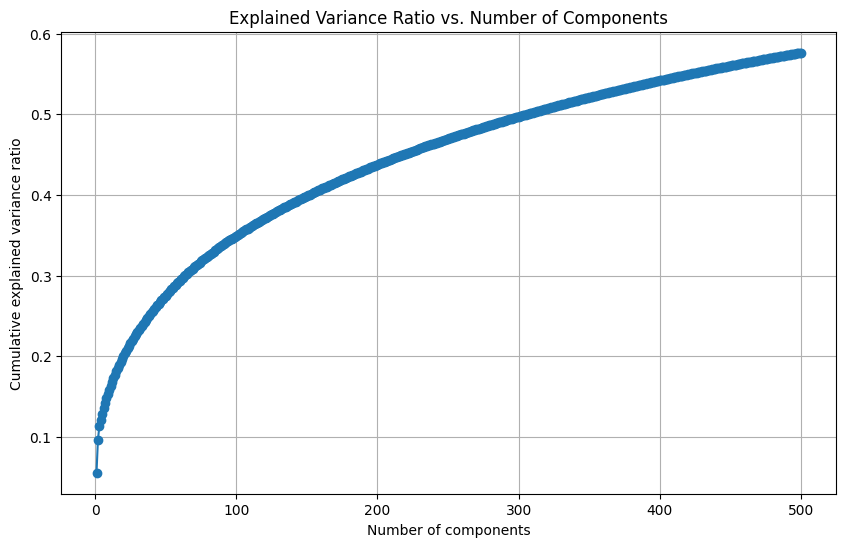

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500+1),svd.explained_variance_ratio_.cumsum(),marker='o',linestyle='-')
plt.xlabel('Number of components')
plt.ylabel("Cumulative explained variance ratio")
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [23]:
transformed_data=svd.transform(bag_of_words)

In [24]:
transformed_data.shape

(50000, 500)

In [25]:
#Splitting the data for training and test purposes
xtrain,xtest,ytrain,ytest=train_test_split(transformed_data,data['sentiment'],test_size=0.2,random_state=42,stratify=data['sentiment'])

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
#Since our sentiment are positive and negative in text we have to assign them an integer value label encoder does this.
encoder=LabelEncoder()
ytrain_encoded=encoder.fit_transform(ytrain)
ytest_encoded=encoder.fit_transform(ytest)

In [28]:
print("Encoded Labels:", ytrain_encoded)
print("Mapping Learned by Encoder:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Encoded Labels: [1 0 0 ... 0 0 0]
Mapping Learned by Encoder: {'negative': 0, 'positive': 1}


In [ ]:
classifiers=[LogisticRegression(),SVC(),RandomForestClassifier()]

In [ ]:
for clf in classifiers:
  clf.fit(xtrain,ytrain_encoded)
  ypred=clf.predict(xtest)

  accuracy = accuracy_score(ytest_encoded, ypred)
  precision = precision_score(ytest_encoded, ypred, average='weighted')
  recall = recall_score(ytest_encoded, ypred, average='weighted')
  f1 = f1_score(ytest_encoded, ypred, average='weighted')
  print(f"{clf.__class__.__name__}:")
  print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

LogisticRegression:
Accuracy: 0.87, Precision: 0.87, Recall: 0.87, F1-score: 0.87
SVC:
Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1-score: 0.86
RandomForestClassifier:
Accuracy: 0.74, Precision: 0.74, Recall: 0.74, F1-score: 0.74


In [44]:
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [45]:
lr = LogisticRegression()


In [46]:
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')


In [49]:
grid_search_lr.fit(xtrain, ytrain_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
best_params_lr = grid_search_lr.best_params_


In [ ]:
best_lr = LogisticRegression(**best_params_lr)

In [ ]:
best_lr.fit(xtrain, ytrain_encoded)


In [ ]:
y_pred_lr = best_lr.predict(xtest)
# Evaluate accuracy and precision for each classifier
accuracy_lr = accuracy_score(ytest_encoded, y_pred_lr)
precision_lr = precision_score(ytest_encoded, y_pred_lr)

print("Logistic Regression - Best Parameters:", best_params_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - Precision:", precision_lr)

In [ ]:
model=LogisticRegression()

In [38]:
model.fit(xtrain,ytrain_encoded)

LogisticRegression()

In [39]:
y_train_pred=model.predict(xtrain)

In [40]:
accuracy_train=accuracy_score(y_train_pred,ytrain_encoded)
print(accuracy_train)

0.87115


In [41]:
y_test_pred=model.predict(xtest)


In [42]:
accuracy_test=accuracy_score(y_test_pred,ytest_encoded)
print(accuracy_test)

0.8678


In [ ]:
user_input="""Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work.
"""
cleaned_input=preprocess_text(user_input)
vectorized_input=vectorizer.transform([cleaned_input])
vectorized_input

<1x193433 sparse matrix of type '<class 'numpy.int64'>'
	with 99 stored elements in Compressed Sparse Row format>

In [ ]:
transformed_input=svd.transform(vectorized_input)


In [ ]:
predicted_sentiment=model.predict(transformed_input)

In [ ]:
if predicted_sentiment==1:
  print("The review is postive")
else:
  print("The review is negative")

The review is postive
